In [27]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
print(data.dtypes)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


In [5]:
categoricals = data.select_dtypes('object')

In [6]:
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [7]:
numericals = data.select_dtypes(include=['int64','float64'])

In [8]:
numericals

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


<function matplotlib.pyplot.show(close=None, block=None)>

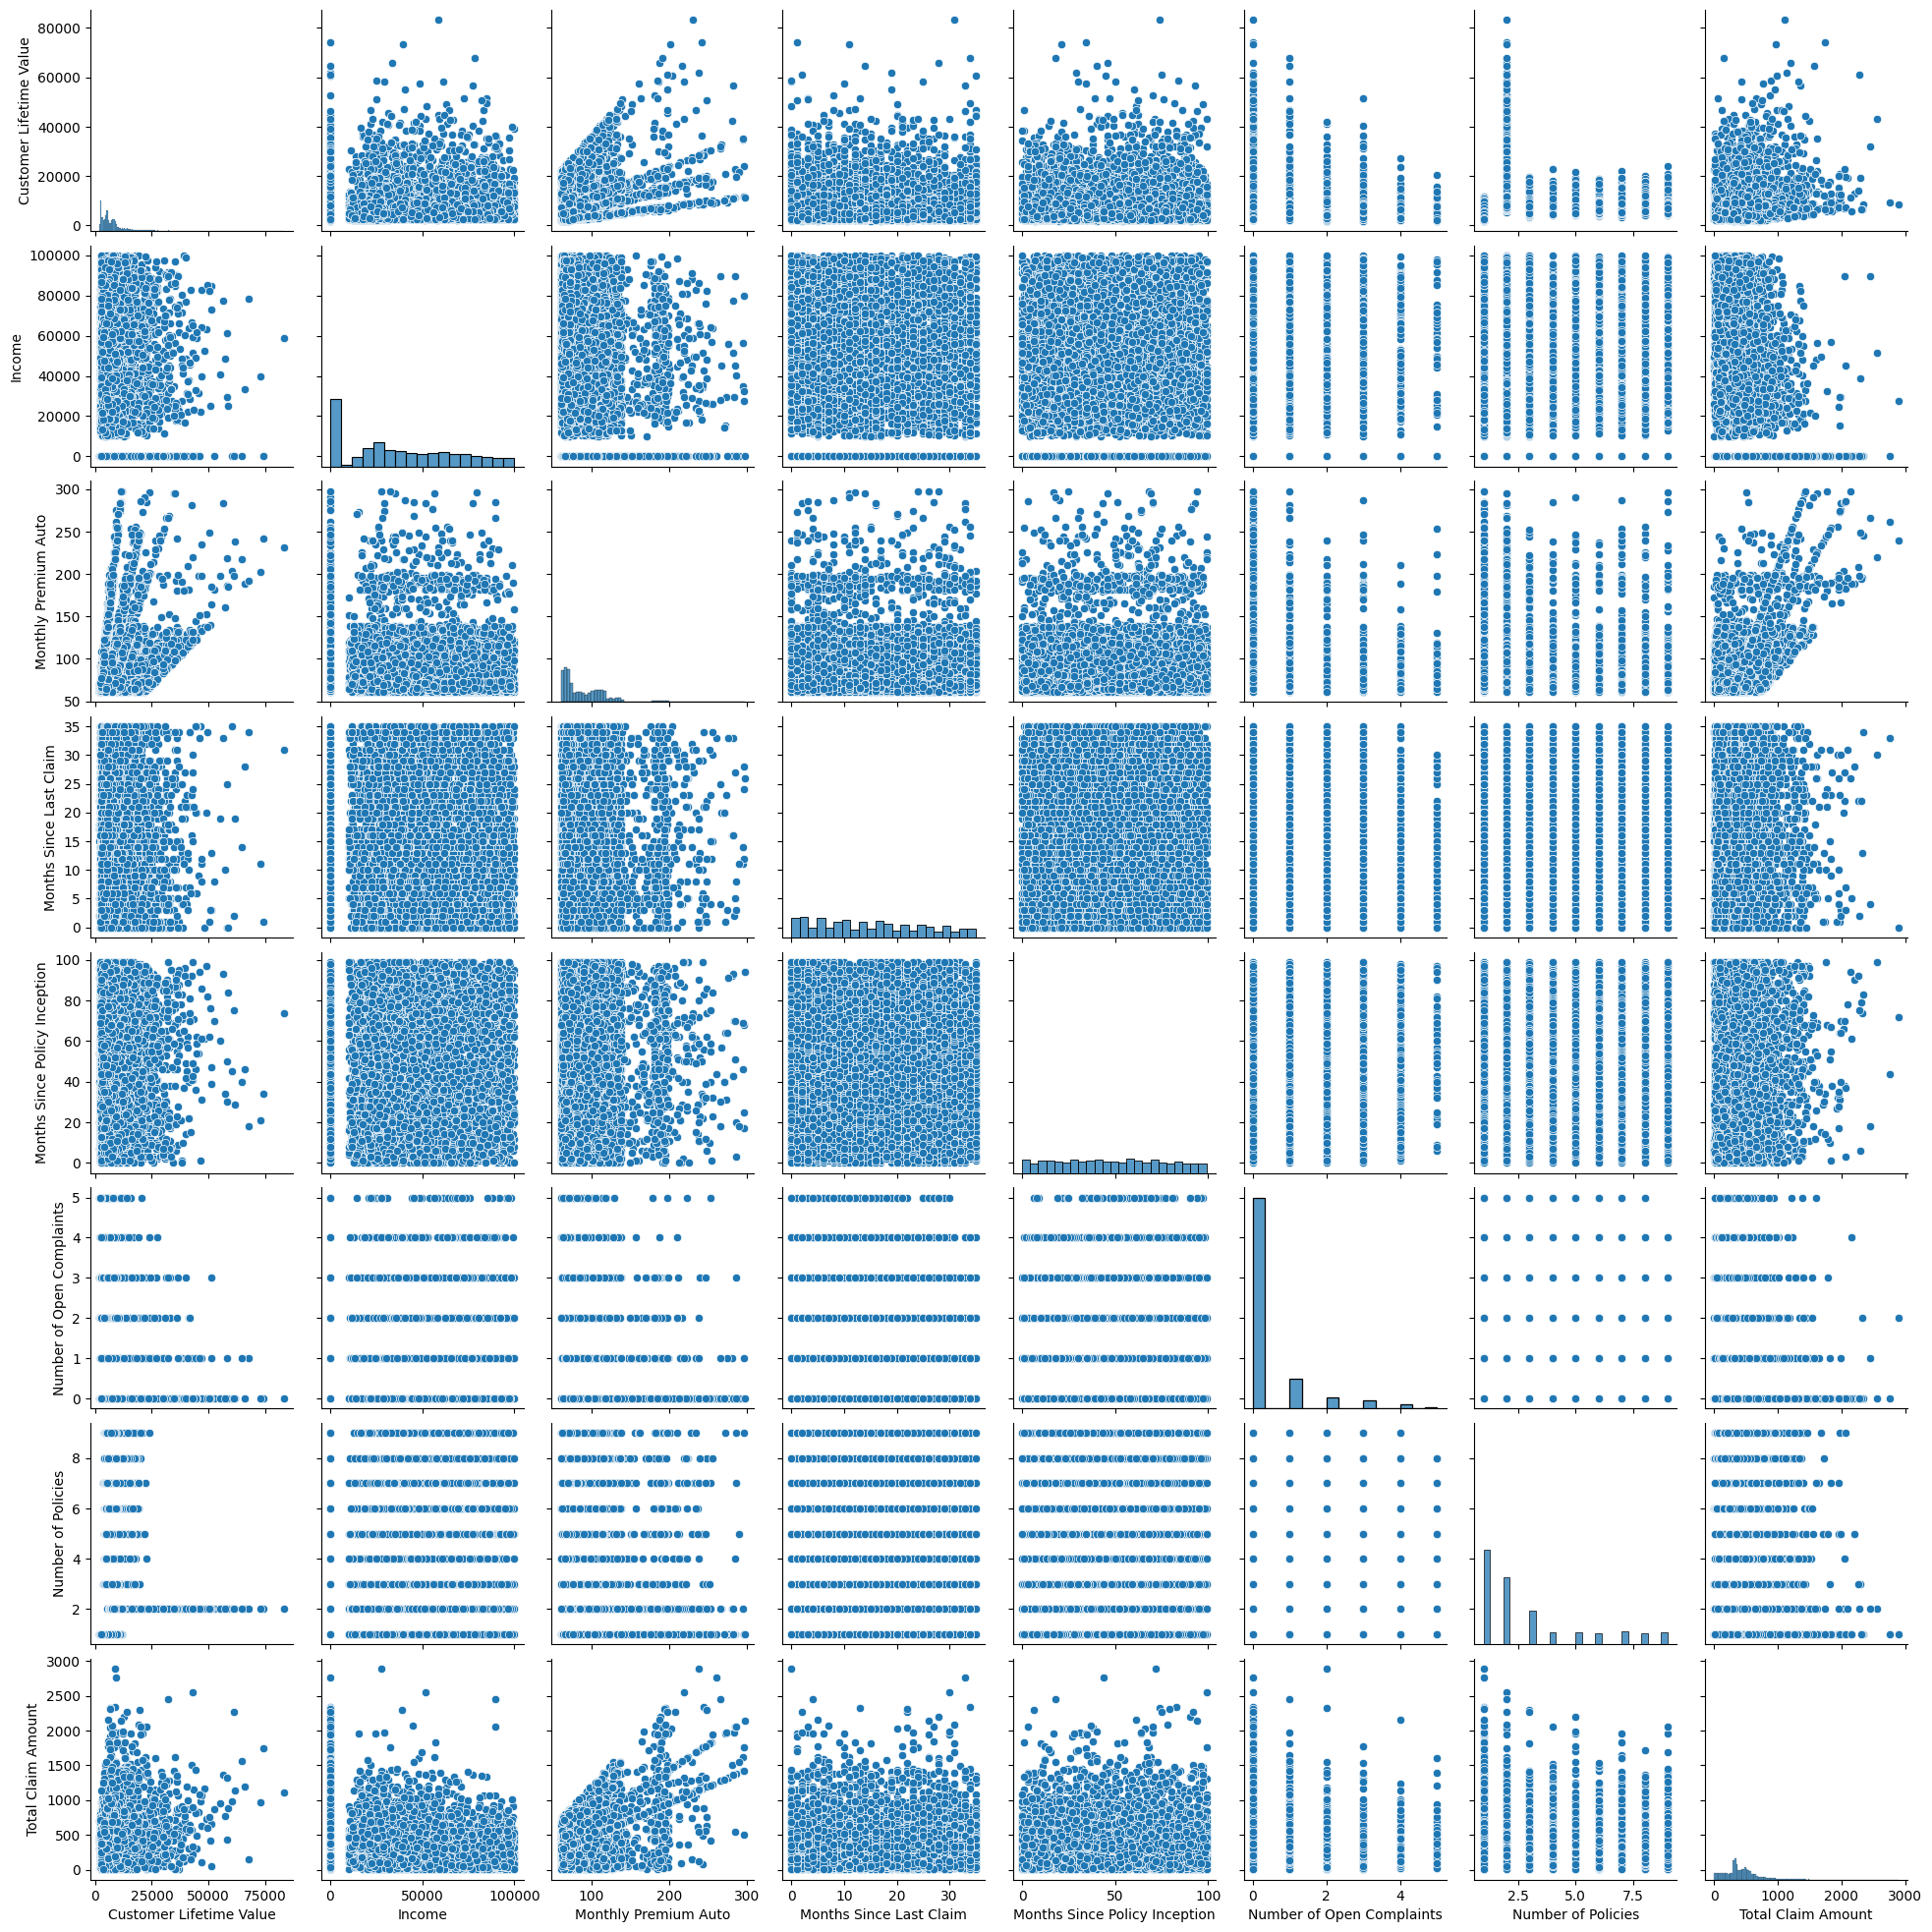

In [9]:
sns.pairplot(numericals)
plt.show

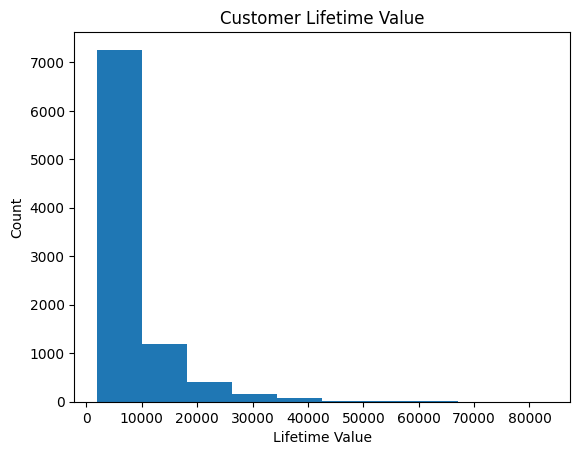

In [10]:
Customer_Lifetime_Value = plt.hist(numericals['Customer Lifetime Value'])
plt.title('Customer Lifetime Value')
plt.xlabel('Lifetime Value')
plt.ylabel('Count')
plt.show()

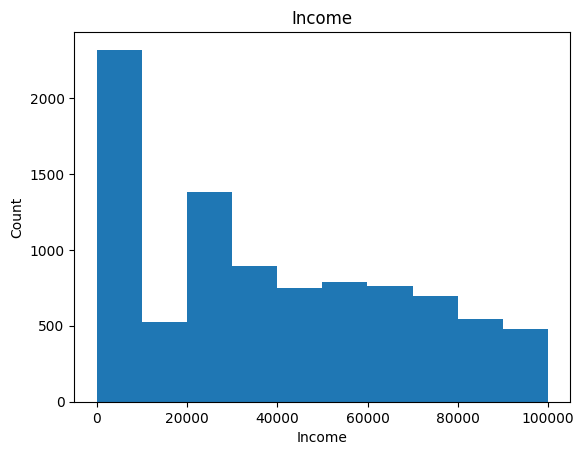

In [11]:
plt.hist(numericals['Income'])
plt.title('Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

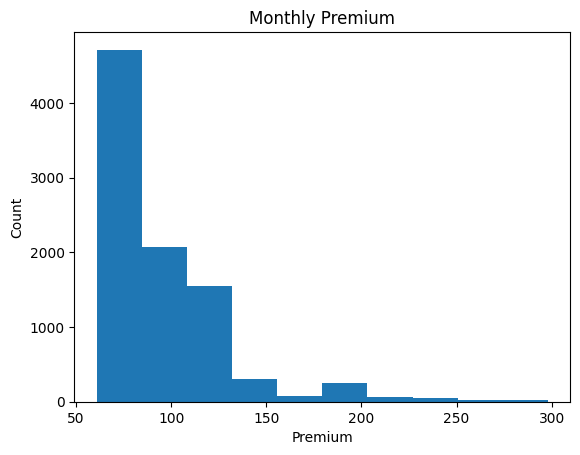

In [12]:
plt.hist(numericals['Monthly Premium Auto'])
plt.title('Monthly Premium')
plt.xlabel('Premium')
plt.ylabel('Count')
plt.show()

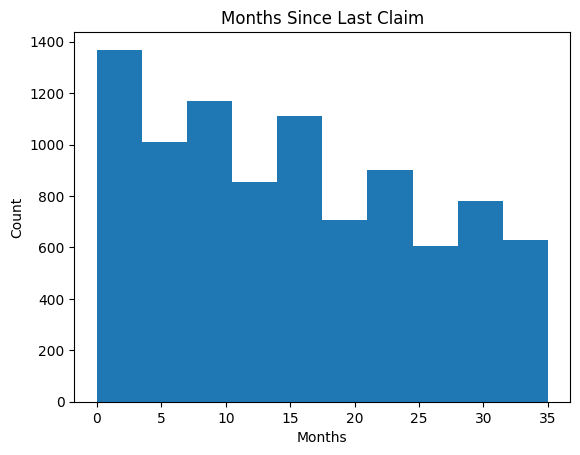

In [13]:
plt.hist(numericals['Months Since Last Claim'])
plt.title('Months Since Last Claim')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

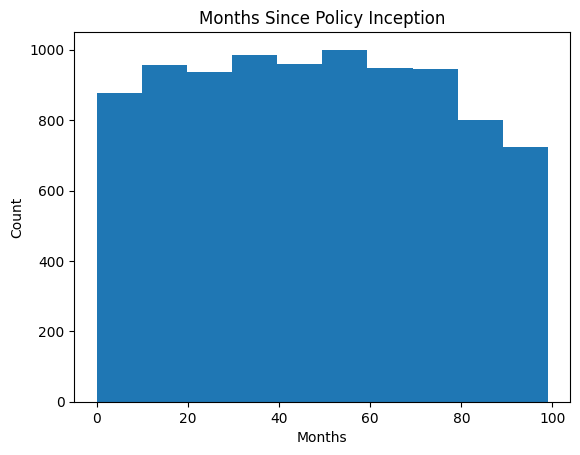

In [14]:
plt.hist(numericals['Months Since Policy Inception'])
plt.title('Months Since Policy Inception')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

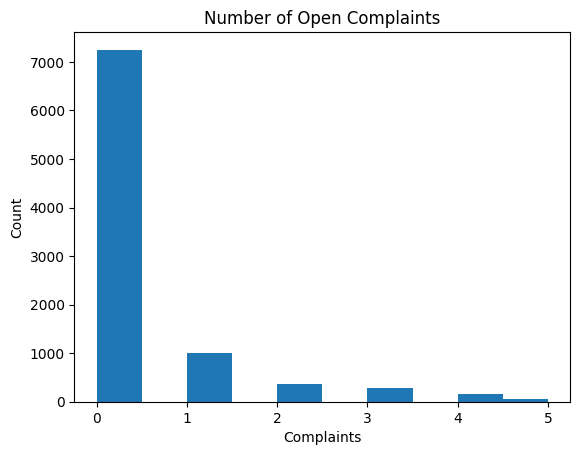

In [15]:
plt.hist(numericals['Number of Open Complaints'])
plt.title('Number of Open Complaints')
plt.xlabel('Complaints')
plt.ylabel('Count')
plt.show()

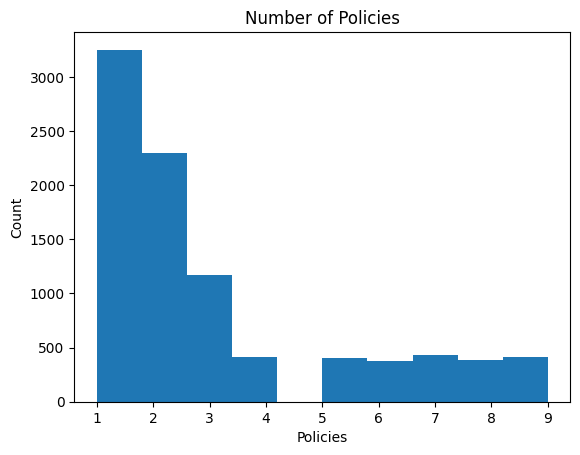

In [16]:
plt.hist(numericals['Number of Policies'])
plt.title('Number of Policies')
plt.xlabel('Policies')
plt.ylabel('Count')
plt.show()


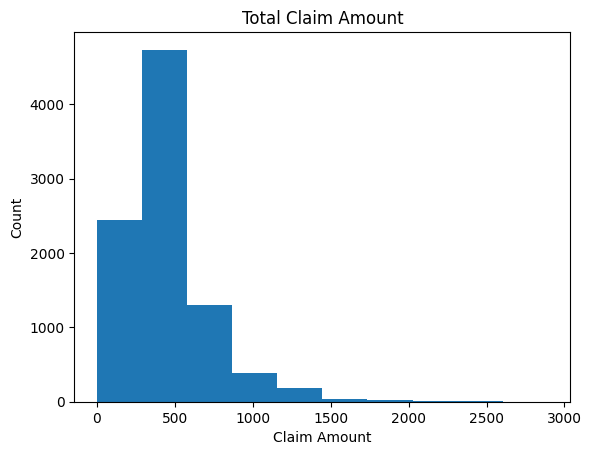

In [17]:
plt.hist(numericals['Total Claim Amount'])
plt.title('Total Claim Amount')
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.show()

In [36]:
mean= np.mean(numericals['Customer Lifetime Value'])
std_dev = np.std(numericals['Customer Lifetime Value'])
z_scores = (numericals['Customer Lifetime Value'] - mean) / std_dev
print(mean)
print(std_dev)


8004.940474987081
6870.591477654132


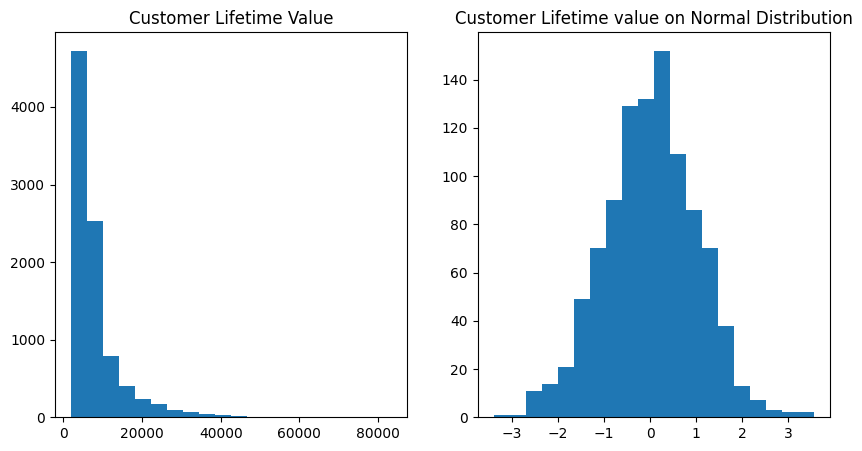

In [52]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Customer Lifetime Value'], bins=20)
plt.title('Customer Lifetime Value')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20)
plt.title('Customer Lifetime value on Normal Distribution')
plt.show()


In [38]:
mean= np.mean(numericals['Income'])
std_dev = np.std(numericals['Income'])
z_scores = (numericals['Income'] - mean) / std_dev
print(mean)
print(std_dev)

37657.38000875848
30378.241676243637


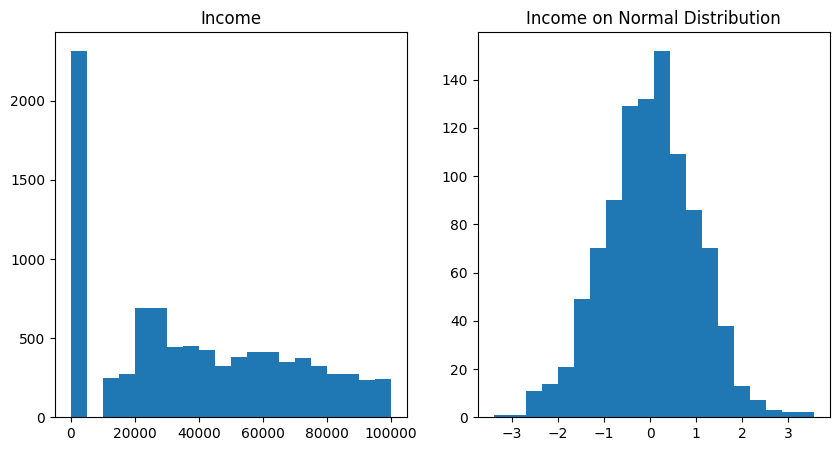

In [53]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Income'], bins=20)
plt.title('Income')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20)
plt.title('Income on Normal Distribution')
plt.show()


In [72]:
mean= np.mean(numericals['Monthly Premium Auto'])
std_dev = np.std(numericals['Monthly Premium Auto'])
z_scores = (numericals['Monthly Premium Auto'] - mean) / std_dev
print(mean)
print(std_dev)

93.21929056273265
34.40608380986522


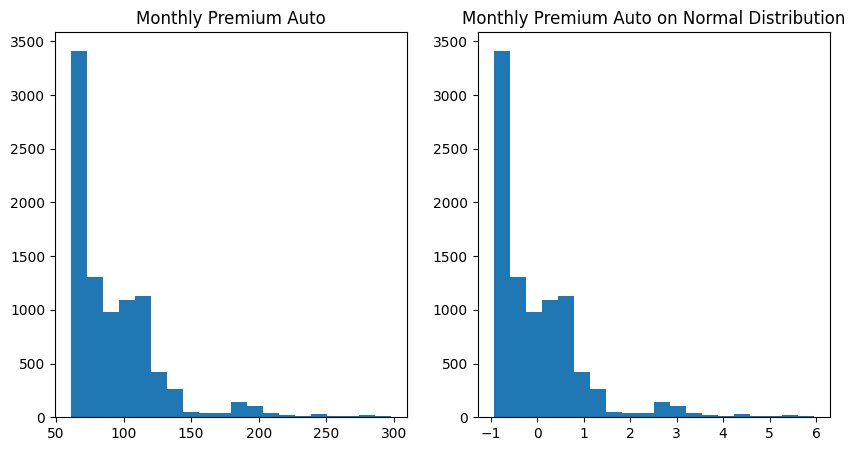

In [73]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Monthly Premium Auto'], bins=20)
plt.title('Monthly Premium Auto')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20)
plt.title('Monthly Premium Auto on Normal Distribution')
plt.show()

In [74]:
mean= np.mean(numericals['Months Since Last Claim'])
std_dev = np.std(numericals['Months Since Last Claim'])
z_scores = (numericals['Months Since Last Claim'] - mean) / std_dev
print(mean)
print(std_dev)


15.097000218962119
10.072705140898593


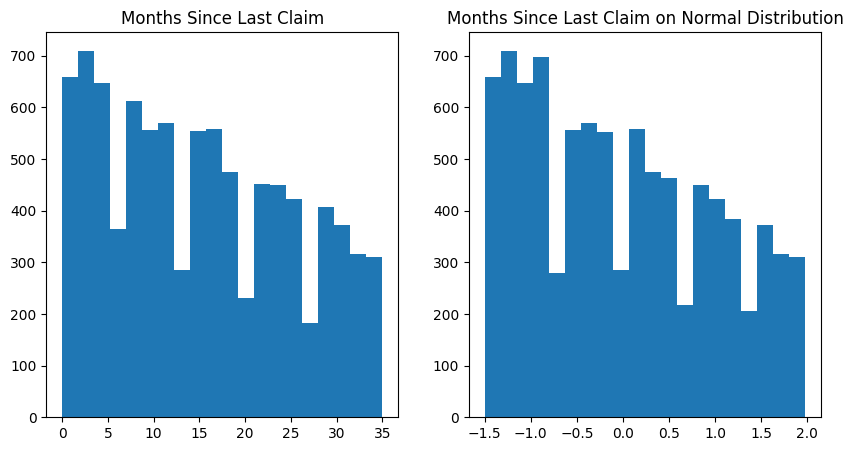

In [75]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Months Since Last Claim'], bins=20)
plt.title('Months Since Last Claim')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20)
plt.title('Months Since Last Claim on Normal Distribution')
plt.show()

In [76]:
mean= np.mean(numericals['Months Since Policy Inception'])
std_dev = np.std(numericals['Months Since Policy Inception'])
z_scores = (numericals['Months Since Policy Inception'] - mean) / std_dev
print(mean)
print(std_dev)

48.064593825268226
27.904463153729804


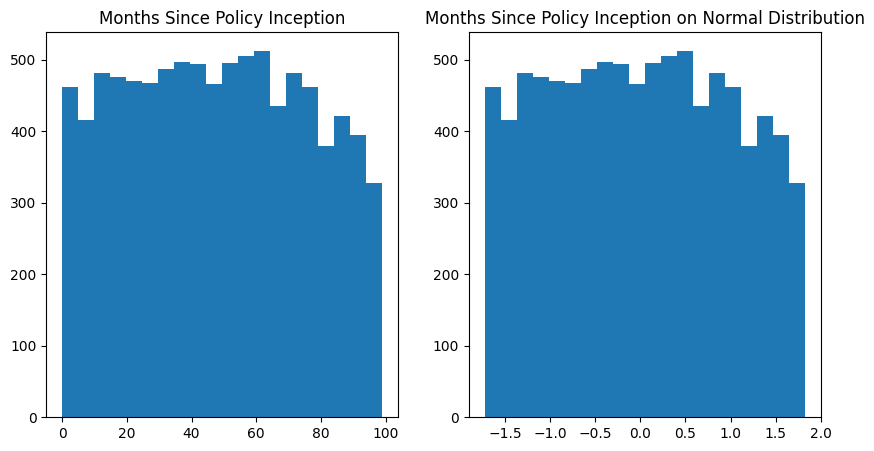

In [77]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Months Since Policy Inception'], bins=20)
plt.title('Months Since Policy Inception')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20)
plt.title('Months Since Policy Inception on Normal Distribution')
plt.show()

In [78]:
mean= np.mean(numericals['Number of Policies'])
std_dev = np.std(numericals['Number of Policies'])
z_scores = (numericals['Number of Policies'] - mean) / std_dev
print(mean)
print(std_dev)

2.9661703525290126
2.3900509663010276


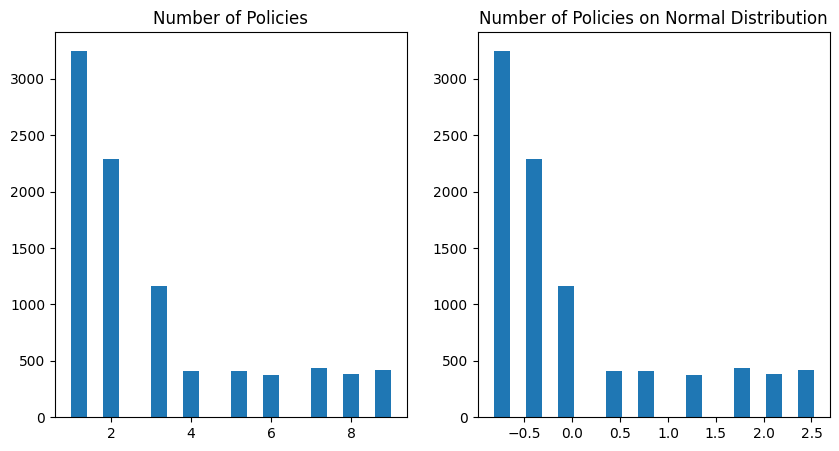

In [79]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Number of Policies'], bins=20)
plt.title('Number of Policies')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20)
plt.title('Number of Policies on Normal Distribution')
plt.show()

In [80]:
mean= np.mean(numericals['Number of Open Complaints'])
std_dev = np.std(numericals['Number of Open Complaints'])
z_scores = (numericals['Number of Open Complaints'] - mean) / std_dev
print(mean)
print(std_dev)

0.38438800087584846
0.9103336953725744


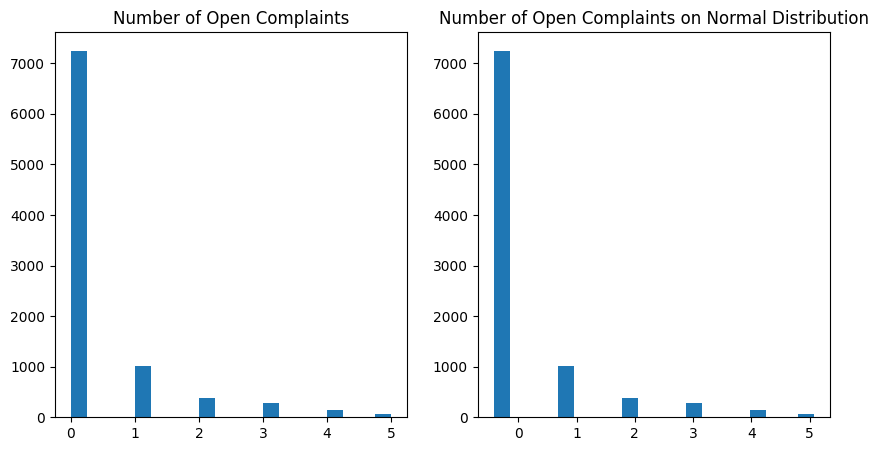

In [81]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Number of Open Complaints'], bins=20)
plt.title('Number of Open Complaints')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20)
plt.title('Number of Open Complaints on Normal Distribution')
plt.show()

In [82]:
mean= np.mean(numericals['Total Claim Amount'])
std_dev = np.std(numericals['Total Claim Amount'])
z_scores = (numericals['Total Claim Amount'] - mean) / std_dev
print(mean)
print(std_dev)

434.0887943128969
290.4841892388862


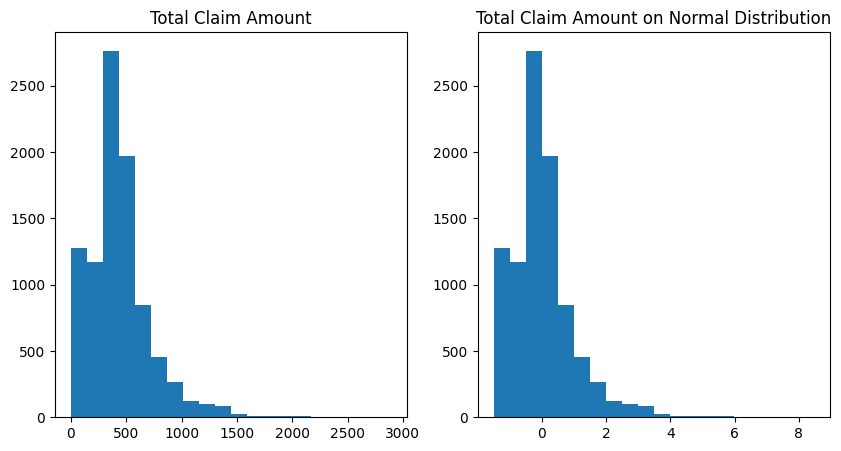

In [83]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Total Claim Amount'], bins=20)
plt.title('Total Claim Amount')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=20)
plt.title('Total Claim Amount on Normal Distribution')
plt.show()

In [87]:
df = pd.DataFrame(numericals)
corr_matrix = df.corr()
print(corr_matrix)

                               Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                    0.005026                

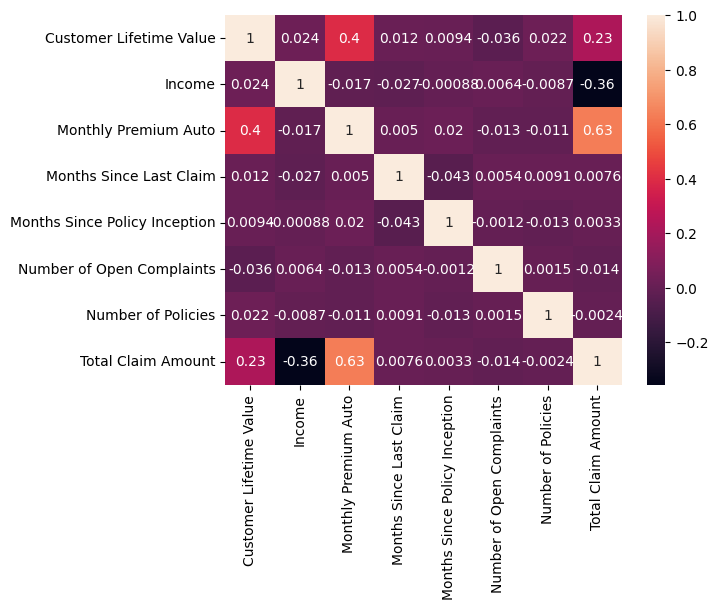

In [85]:
sns.heatmap(numericals.corr(), annot = True)
plt.show()
#There is no high correlation